In [221]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [222]:
df = pd.read_csv('C:\DS practice\HR_comma_sep.csv')


In [223]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [224]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [225]:
left = df[df.left == 1]

In [226]:
retained = df[df.left ==0]

In [227]:
df.groupby('left').mean(numeric_only=True)  #Deprecated since version 1.5.0: Specifying numeric_only=None is deprecated. 
                                            #The default value will be False in a future version of pandas.
                                            #Changed default of numeric_only in various DataFrameGroupBy methods; all methods now default to numeric_only=False

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**From here we can see that employees who left the organisation had
i)   Low satisfaction_level
ii)  More average_monthly_hours
iii) Less promotions**

<Axes: xlabel='salary'>

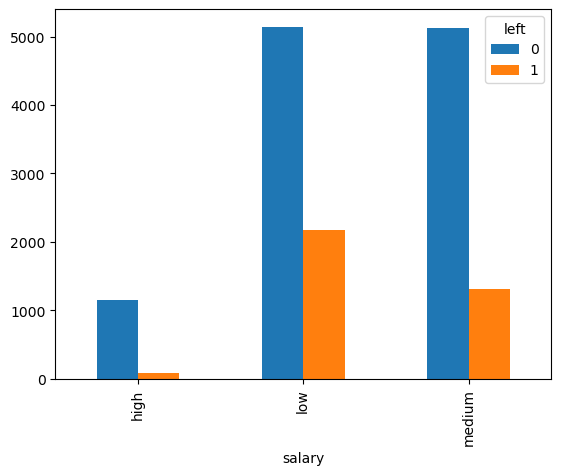

In [228]:
pd.crosstab(df.salary,df.left).plot(kind='bar')   #Huge salary gap amoungst the employees who left the org vs who were retained

<Axes: xlabel='Department'>

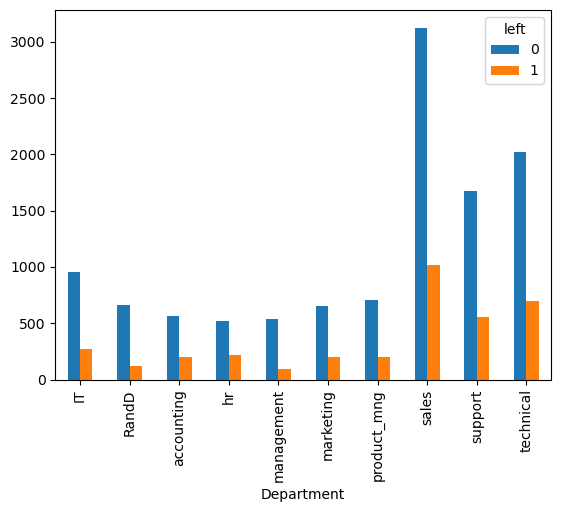

In [229]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

**From above Data exploration we can conclude that following independent variable will have major impact on our model.
i)   Satisfaction level
ii)  Average_monthly_hours
iii) Less promotions
iv)  Salary**

In [230]:
from sklearn.preprocessing import LabelEncoder

In [231]:
le = LabelEncoder()

In [232]:
dfle = df
dfle.salary = le.fit_transform(dfle.salary)

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train,X_test,y_train,y_test = train_test_split(dfle[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years'
                                                    ,'salary']],dfle.left, train_size = 0.7)

In [235]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
1750,0.88,255,0,1
13860,0.91,195,0,2
4837,0.17,259,0,1
11843,0.62,266,0,0
11061,0.90,203,0,2
...,...,...,...,...
7723,1.00,215,0,2
1719,0.77,249,0,1
12047,0.57,273,0,1
8516,0.67,149,0,1


In [236]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
2080,0.69,106,0,1
5793,0.80,271,0,2
11950,0.49,244,0,1
567,0.10,282,0,2
13588,0.95,259,0,1
...,...,...,...,...
13298,0.55,169,0,2
3637,0.55,132,0,2
9966,0.74,154,0,2
6794,0.61,139,0,2


In [237]:
from sklearn.linear_model import LogisticRegression

In [238]:
lr = LogisticRegression()

In [239]:
lr.fit(X_train,y_train)

LogisticRegression()

In [240]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [241]:
lr.score(X_train,y_train)

0.7746452043051719

<Axes: xlabel='salary'>

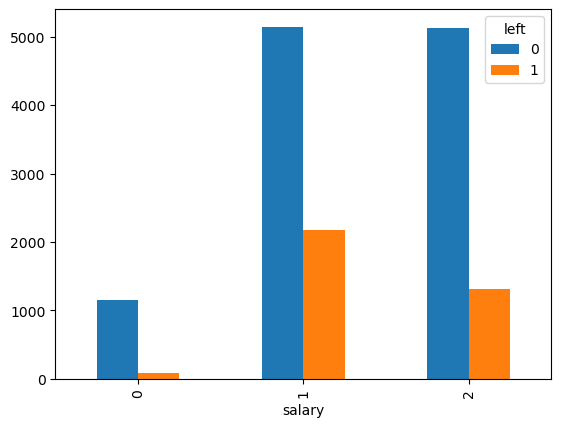

In [242]:
pd.crosstab(dfle.salary,dfle.left).plot(kind = "bar")

<Axes: xlabel='salary'>

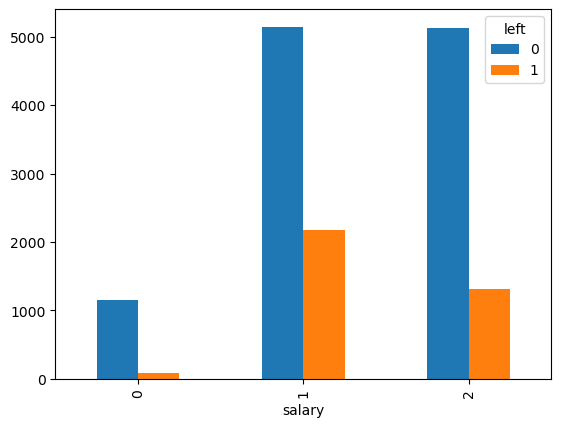

In [243]:
pd.crosstab(df.salary,df.left).plot(kind = "bar")